# Tutorial 10: Validation and Reproducibility

## Validation

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly-static")

Split our dataset into a train and validation set. We will use the validation set to check the performance of our model. The size of the validation set is 20% of our total dataset. Adapt the size with the parameter `valid_p` in `split_df`.

In [2]:
df_train, df_val = m.split_df(df, valid_p=0.2)

print("Dataset size:", len(df))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 1462
Train dataset size: 1170
Validation dataset size: 292


Validation is performed by passing the validation set to the fit method during training. The resulting metrics show the performance of the model compared to our validation set. 

In [3]:
metrics = m.fit(df_train, validation_df=df_val, progress=None)
metrics

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,151.067062,159.602341,2.067798,0.0,0,75.920654,89.007133,0.699122,0.0
1,147.524399,155.866516,2.007845,0.0,1,74.146973,86.745255,0.676098,0.0
2,143.015457,151.105865,1.931547,0.0,2,71.729416,84.111290,0.645402,0.0
3,137.148010,144.921494,1.832287,0.0,3,68.274185,80.496658,0.602091,0.0
4,129.434494,136.787064,1.701819,0.0,4,64.227638,75.879417,0.549886,0.0
...,...,...,...,...,...,...,...,...,...
180,7.111052,9.061026,0.011818,0.0,180,4.582942,6.183656,0.004233,0.0
181,7.106644,9.057316,0.011808,0.0,181,4.587008,6.228304,0.004246,0.0
182,7.100244,9.049046,0.011786,0.0,182,4.592853,6.206255,0.004245,0.0
183,7.102000,9.050427,0.011790,0.0,183,4.603105,6.197680,0.004274,0.0


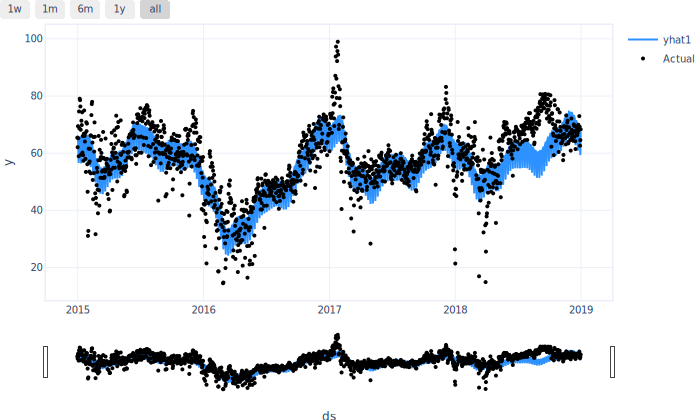

In [4]:
forecast = m.predict(df)
m.plot(forecast)

For advanced validation and testing methods, check out the *Test and CrossValidate* tutorial in the *How to guides* section.


## Reproducibility
The variability of results comes from SGD finding different optima on different runs.
The majority of the randomness comes from the random initialization of weights, different learning rates and different shuffling of the dataloader.
We can control the random number generator by setting it's seed:

In [5]:
from neuralprophet import set_random_seed

set_random_seed(0)

Aditionally, it is important to make sure to set the flag `deterministic` in the `fit` function to `True`.

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Model and prediction
m = NeuralProphet()

df_train, df_val = m.split_df(df, valid_p=0.2)

# Set the deterministic flag to True
metrics = m.fit(df_train, validation_df=df_val, progress=None, deterministic=True)

This should lead to identical results every time you run the model. 
Note that you have to explicitly set the random seed to the same random number each time before fitting the model.